In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

# Base de Datos

In [2]:
tickers = ["PG", "BEI.DE"]
weight = np.array([0.5,0.5])

data = pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source='yahoo', start='2007-1-1')['Adj Close']
data


,PG,BEI.DE
Date,,
2007-01-03,42.380424,40.627869
2007-01-04,42.058666,40.894630
2007-01-05,41.697510,40.053936
2007-01-08,41.789440,40.062027
2007-01-09,41.684357,39.156666
...,...,...
2021-03-17,128.419998,88.260002
2021-03-18,128.699997,88.139999
2021-03-19,128.009995,88.139999


<AxesSubplot:xlabel='Date'>

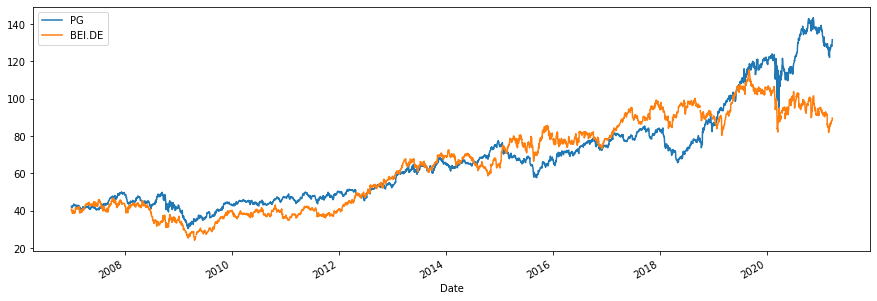

In [3]:
data.plot(figsize=(15,5))

<AxesSubplot:xlabel='Date'>

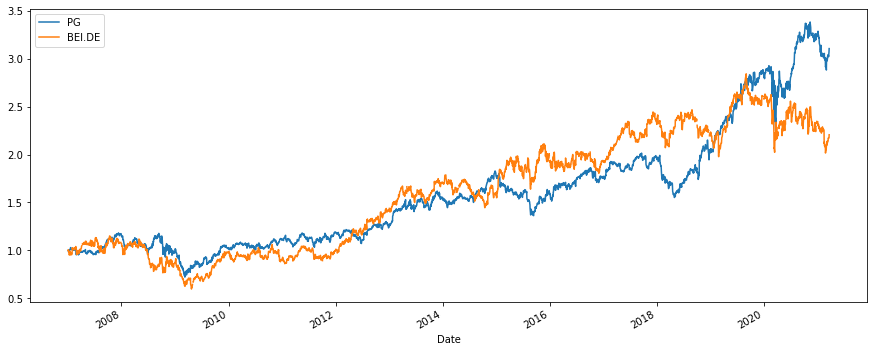

In [4]:
(data/data.iloc[0]).plot(figsize=(15,6)) #Grafica Estandarizada

# Retornos - Logaritmos

In [20]:
retornos = np.log(data/data.shift(1))
retornos.mean() * 250#retornos[['NPSNY','MO']].mean()

PG        0.079169
BEI.DE    0.050256
dtype: float64

# Variabilidad - Retornos

In [22]:
retornos.std()* 250**0.5

PG        0.187559
BEI.DE    0.219163
dtype: float64

In [23]:
retornos.var()*250

PG        0.035178
BEI.DE    0.048033
dtype: float64

# Covarianza y Correlacion

In [25]:
matrix_cov=retornos.cov() *250
matrix_cov #.iloc[0,0]

,PG,BEI.DE
PG,0.035178,0.011148
BEI.DE,0.011148,0.048033


In [9]:
retornos.corr()

,PG,BEI.DE
PG,1.00000,0.27083
BEI.DE,0.27083,1.00000


# Analisis de la cartera

In [10]:
weight 

array([0.5, 0.5])

In [26]:
# Rendimiento de la cartera:
np.dot(weight,retornos.mean())

0.00025884944699378055

In [29]:
# Varianza de la cartera
np.dot(weight.T,np.dot(retornos.cov()*250,weight))

0.02637686425840914

In [28]:
# Variabilidad de la cartera
np.dot(weight.T,np.dot(retornos.cov()*250,weight)) **0.5

0.1624095571646236

# Riesgo Diversificable y No Diversificable
Riesgo Diversificable = portafolio variance - weight annual variances


In [41]:
pv = np.dot(weight.T,np.dot(retornos.cov()*250,weight))
pv

0.02637686425840914

In [38]:
wav = retornos.cov().iloc[0,0]*250 * (weight[0]**2) + retornos.cov().iloc[1,1]*250 * (weight[1]**2)
wav

0.020802732143576683

In [42]:
dr = pv-wav
dr

0.0055741321148324585

In [45]:
print (str(round(dr *100,5)) ,"%")

0.55741 %
